# Test Analysis dependence on Area

In [1]:
# imports
from frb.associate import frbs, frbassociate

# Priors

In [2]:
nhalf = 10.  # Not sure if this is used

In [3]:
theta_max = 6.
theta_u = dict(method='uniform', max=theta_max)
theta_e = dict(method='exp', max=theta_max)

In [4]:
conservative = dict(theta=theta_u, M='identical', S=0.00, name='Conservative', nhalf=nhalf)
adopted = dict(theta=theta_e, M='inverse', S=-1, name='Adopted', nhalf=nhalf)

# Test case -- 181112

In [5]:
config_181112 = frbs.frb181112

In [6]:
config_181112

{'max_radius': 10.0,
 'cut_size': 30.0,
 'deblend': True,
 'cand_bright': 18.0,
 'cand_separation': <Quantity 10. arcsec>,
 'skip_bayesian': False,
 'npixels': 9,
 'name': 'FRB181112',
 'image_file': '/home/xavier/Projects/FRB_Software/FRB/Galaxy_DB/CRAFT/Prochaska2019/FRB181112_VLT_FORS2_I.fits',
 'filter': 'VLT_FORS2_I',
 'ZP': 32.3,
 'plate_scale': <Quantity 0.25226 arcsec>}

## Standard

Using image /home/xavier/Projects/FRB_Software/FRB/Galaxy_DB/CRAFT/Prochaska2019/FRB181112_VLT_FORS2_I.fits


/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/scikit_image-0.17.2-py3.8-linux-x86_64.egg/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


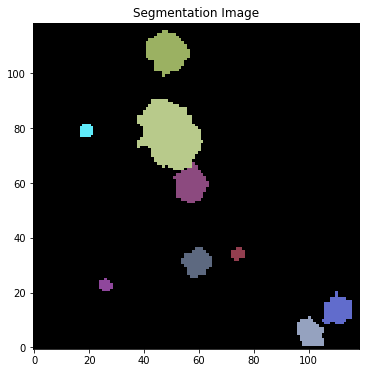

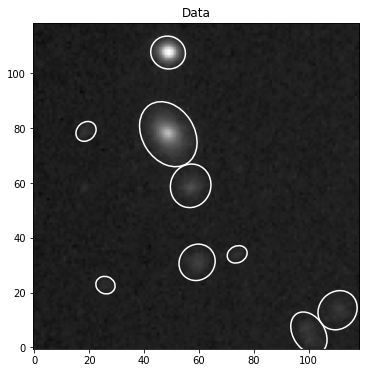

In [7]:
frbA_181112 = frbassociate.run_individual(config_181112, show=True)

In [8]:
frbA_181112.run_bayes(conservative)

All done with Bayes


/data/Projects/FRB_Software/FRB/frb/associate/frbassociate.py:180: UserWarning: Need to improve the hack above
  warnings.warn("Need to improve the hack above")


In [9]:
frbA_181112.candidates[['ra', 'dec', frbA_181112.filter, 'P_c', 'P_O', 'P_Ox']].sort_values('P_Ox', ascending=False)

,ra,dec,VLT_FORS2_I,P_c,P_O,P_Ox
7,327.348647,-52.970912,21.489951,0.019159,0.25,5.253186e-01
8,327.349595,-52.969594,19.101505,0.005546,0.25,4.746814e-01
3,327.348375,-52.972866,22.012809,0.138014,0.25,2.275535e-73
4,327.346675,-52.972663,24.045799,0.595951,0.25,3.596429e-281


In [10]:
frbA_181112.max_radius

10.0

## Increase max_radius

In [11]:
config_181112_bigger = config_181112.copy()
config_181112_bigger['max_radius'] = 30.
config_181112_bigger['cut_size'] = 30.

In [12]:
config_181112_bigger

{'max_radius': 30.0,
 'cut_size': 30.0,
 'deblend': True,
 'cand_bright': 18.0,
 'cand_separation': <Quantity 10. arcsec>,
 'skip_bayesian': False,
 'npixels': 9,
 'name': 'FRB181112',
 'image_file': '/home/xavier/Projects/FRB_Software/FRB/Galaxy_DB/CRAFT/Prochaska2019/FRB181112_VLT_FORS2_I.fits',
 'filter': 'VLT_FORS2_I',
 'ZP': 32.3,
 'plate_scale': <Quantity 0.25226 arcsec>}

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/scikit_image-0.17.2-py3.8-linux-x86_64.egg/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Using image /home/xavier/Projects/FRB_Software/FRB/Galaxy_DB/CRAFT/Prochaska2019/FRB181112_VLT_FORS2_I.fits


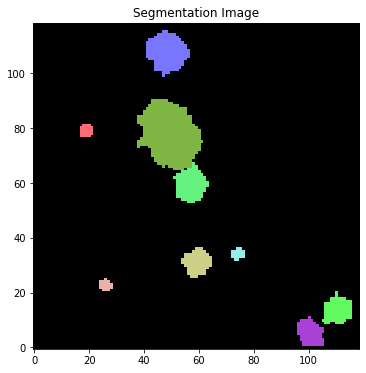

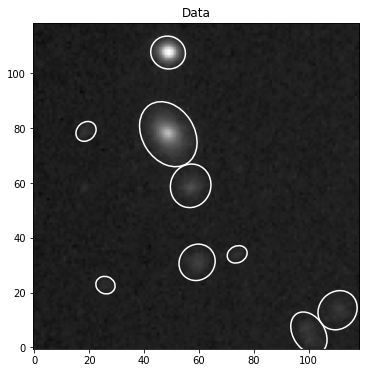

In [13]:
frbA_181112_bigger = frbassociate.run_individual(config_181112_bigger, show=True)

In [14]:
frbA_181112_bigger.run_bayes(conservative)

All done with Bayes


/data/Projects/FRB_Software/FRB/frb/associate/frbassociate.py:180: UserWarning: Need to improve the hack above
  warnings.warn("Need to improve the hack above")


In [15]:
frbA_181112_bigger.candidates[['ra', 'dec', frbA_181112.filter, 'P_c', 'P_O', 'P_Ox']].sort_values('P_Ox', ascending=False)

,ra,dec,VLT_FORS2_I,P_c,P_O,P_Ox
7,327.348647,-52.970912,21.489951,0.019159,0.25,5.261931e-01
8,327.349595,-52.969594,19.101505,0.005546,0.25,4.738069e-01
3,327.348375,-52.972866,22.012809,0.138014,0.25,6.739708e-73
4,327.346675,-52.972663,24.045799,0.595951,0.25,2.897342e-289


# Add em in

In [17]:
frbA_181112.candidates['P_Ox_big'] = frbA_181112_bigger.candidates.P_Ox

In [18]:
frbA_181112.candidates[['ra', 'dec', frbA_181112.filter, 'P_c', 'P_O', 'P_Ox', 'P_Ox_big']].sort_values('P_Ox', ascending=False)

,ra,dec,VLT_FORS2_I,P_c,P_O,P_Ox,P_Ox_big
7,327.348647,-52.970912,21.489951,0.019159,0.25,5.253186e-01,5.261931e-01
8,327.349595,-52.969594,19.101505,0.005546,0.25,4.746814e-01,4.738069e-01
3,327.348375,-52.972866,22.012809,0.138014,0.25,2.275535e-73,6.739708e-73
4,327.346675,-52.972663,24.045799,0.595951,0.25,3.596429e-281,2.897342e-289


In [20]:
frbA_181112.candidates.P_Ox - frbA_181112_bigger.candidates.P_Ox

3    -4.464172e-73
4    3.596429e-281
7    -8.744858e-04
8     8.744858e-04
Name: P_Ox, dtype: float64